# Problem Statement -

- Build your own recommendation system for products on an e-commerce website like Amazon.com.

- Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

 

# Dataset columns 
- first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

# Source 
- Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets. For this case study, we are using the Electronics dataset

## Please do the analysis based on steps( 1 to 8) as given below - 

Steps -

1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

### Please Note - 

1. If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.
2. If you are stuck at the model evaluation part of this project.

#### Please refer to below links - 

1. https://surprise.readthedocs.io/en/stable/accuracy.html (Links to an external site.)Links to an external site.
2. http://surpriselib.com/ (Links to an external site.)Links to an external site. - Getting started, example

In [1]:
# to ignore warning we can import warnings library 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries 
import pandas as pd # to read the dataset 
import numpy as np  # for Mathematical oprations 
import matplotlib.pyplot as plt # For visualization 
import seaborn as sns # for visualization 

In [3]:
# To read the dataset 
df = pd.read_csv('ratings_Electronics.csv')

In [4]:
# setting Collumns Header 
df.columns=['userid','productid','rating','timestamp']

In [5]:
# To see how our dataframe looks like 
df.head()

,userid,productid,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
# Understanding the datatype and number entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userid       object
productid    object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
# As we dont need timestam we can drop it 
df = df.drop(['timestamp'],axis=1)

In [8]:
df.shape

(7824481, 3)

In [9]:
# Checking Nan values are present or not 
df.isna().sum()

userid       0
productid    0
rating       0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [11]:
# Fetching total no of unique values present in each column
for i  in df.columns:
    print ('Unique values present in {} are : '.format(i),(df[i].nunique()))
    

# for col in list(df):
#     print (col, df[col].nunique() )

Unique values present in userid are :  4201696
Unique values present in productid are :  476001
Unique values present in rating are :  5


In [12]:
# counting frequency 
# count = []
for i in df.columns:
    print ('value count for column {} is  ='.format(i) ,df[i].value_counts())
#     count.append(df[i].value_counts().argmax())
# count

value count for column userid is  = A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A3CW0ZLUO5X2B1    227
                 ... 
A38KHPY68Z4CU8      1
ACJ0RAXHQNNCE       1
A1SG0RS52XCPMA      1
A2VID2RCC2H57R      1
A3VM3D29G6X0ZQ      1
A5LO0IAB5XCUM       1
AES8M55P8WVN0       1
A1U27J3NSEAY3U      1
A1XJ73IF9DASR9      1
A2I3MHF6PL6ME0      1
A15VEJ0DVI3T9Q      1
A129ZIOVPDD3HT      1
A379EM50C24260    

In [13]:
# getting idea about mean rating of the products 
df.groupby('productid')['rating'].mean().head() 

productid
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
0558835155    3.000000
Name: rating, dtype: float64

In [ ]:
# CCC
# getting idea about how mean rating of the products are given by users 
# df.groupby('productid')['rating'].mean().value_counts().head() 
# It gives idea about how many people have taken the product and rated the product 

In [14]:
# getting idea about count of rating of the products and sorting the values 
df.groupby('productid')['rating'].count().sort_values(ascending=False).head()  

productid
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

In [15]:
# sorting the products rating 
df.groupby('productid')['rating'].mean().sort_values(ascending=False).head() 

productid
BT008V9J9U    5.0
B0058PRC0S    5.0
B0058ORBFU    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
Name: rating, dtype: float64

In [16]:
# getting an idea about count of each rating given by user 
df.groupby('rating').count()

,userid,productid
rating,,
1.0,901765,901765
2.0,456322,456322
3.0,633073,633073
4.0,1485781,1485781
5.0,4347540,4347540


#### Observing the distribution plot of rating 


In [17]:
# creating dataframe for plotting 
df_gp = df.groupby('rating').agg({'userid': 'count'}).reset_index()
df_gp.columns = ['Rating', 'Count']
df_gp.head()

,Rating,Count
0,1.0,901765
1,2.0,456322
2,3.0,633073
3,4.0,1485781
4,5.0,4347540


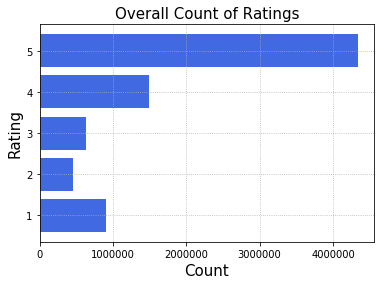

In [18]:
#ploting the axis label and ploting name 
plt.barh(df_gp.Rating, df_gp.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.grid(ls='dotted')
plt.show()

In [19]:
# keeping users only who has given 50 or more number of ratings 
# keeing count of rating of a user in count variable 
count = df.groupby('userid')['rating'].count()

In [23]:
# creating new dataframe in which we have only those users who have given 50 or more then 50 product
# df_50_greater=df.groupby('userid').filter(lambda x:x['rating'].count() >=50)
df_50_greater=df[df['userid'].isin(count[count >= 50].index)]
df_50_greater['userid'].value_counts()# To cross check 

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A2MIP3AQVSF2SS     50
A1C5TCCR2IGKBU     50
A19N3S7CBSU6O7     50
A3JAH5WW61N2EK     50
A1LA4K5JF78BER     50
A2RS66Y79Q8X0W     50
A11R5VW7IM6ISQ     50
A25TNBMJ4ZO7RD     50
AA8RBTN3J2F5H      50
A1UNJ46NSB352E     50
A20ZM879PCQQEZ     50
A3QD59N3M7O7KB     50
A2Y4H3PXB07WQI     50
A319Y83RT0MRVR     50
A3EX8ZFNVD

In [24]:
print('Before removing user who had given rating on 50 or more product shape is :',df.shape)
print('After removing user who have not given rating on 50 or more product shape is :',df_50_greater.shape)

Before removing user who had given rating on 50 or more product shape is : (7824481, 3)
After removing user who have not given rating on 50 or more product shape is : (125871, 3)


In [31]:
# observing the head of new dataframe
print (df_50_greater.shape)
df_50_greater.reset_index(drop=True).head()

(125871, 3)


,userid,productid,rating
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [36]:
# Mean rating of each product is captured in 'ratings_mean_count'
ratings_mean_count = pd.DataFrame(df_50_greater.groupby('productid')['rating'].mean()) 

In [37]:
# Capturing number of user for each product who had given rating for that product in new column in 'ratings_mean_count'
ratings_mean_count['rating_counts'] =pd.DataFrame(df_50_greater.groupby('productid')['rating'].count())

In [38]:
ratings_mean_count.head() 

,rating,rating_counts
productid,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [39]:
ratings_mean_count= ratings_mean_count.reset_index(drop = False)
df_100_product= ratings_mean_count[ratings_mean_count['rating_counts'] >100]
df_100_product

,productid,rating,rating_counts
11078,B000N99BBC,4.772455,167
21982,B002R5AM7C,4.125000,128
22210,B002SZEOLG,4.247788,113
22460,B002V88HFE,4.698113,106
23378,B0034CL2ZI,4.632075,106
24827,B003ES5ZUU,4.864130,184
28761,B004CLYEDC,4.669492,118
31001,B004T9RR6I,3.871560,109
38250,B007WTAJTO,4.701220,164
38611,B00829THK0,4.416058,137


In [81]:
df_100_product_sorted = df_100_product.sort_values('rating',ascending=False)
df_100_product_sorted.head()

,productid,rating,rating_counts
24827,B003ES5ZUU,4.864130,184
11078,B000N99BBC,4.772455,167
38250,B007WTAJTO,4.701220,164
22460,B002V88HFE,4.698113,106
28761,B004CLYEDC,4.669492,118


In [82]:
rec_count = df_100_product_sorted.reset_index(drop = True)
rec_count # recommended electronics product based on popularity 

,productid,rating,rating_counts
0,B003ES5ZUU,4.864130,184
1,B000N99BBC,4.772455,167
2,B007WTAJTO,4.701220,164
3,B002V88HFE,4.698113,106
4,B004CLYEDC,4.669492,118
5,B00834SJSK,4.643564,101
6,B0034CL2ZI,4.632075,106
7,B00834SJNA,4.490909,110
8,B00829TIEK,4.436242,149
9,B00829THK0,4.416058,137


>- For popularity based recomendation system we recommend popular items which are also rated high 
>- Its not clear if we just recommend the product based on high rating, we may missed on trending items 
>- So it is important to take considreation of how many users had rated the product 
>- So it is good if we select some threshold for products which are rated by minimum number of users
>- We are selecting those products which are rated by atleast 100 user 

In [61]:
# Importing Surprise library pakages 
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import collections
from surprise.model_selection import train_test_split

In [62]:
# As we're loading a custom dataset, we need to define a reader. In the
# ratings_Electronics.csv dataset, each line has the following format:
# 'user item rating ', separated by ',' characters.
reader = Reader(line_format='user item rating ', sep=',',rating_scale=(1, 5))

In [63]:
# Loading the data into surprise library object
data = Dataset.load_from_df(df_50_greater[['userid', 'productid', 'rating']], reader)

In [64]:
# Observe the data type.It is surprise.dataset
data

In [65]:
# Spliting the data into train and test 
trainset, testset = train_test_split(data, test_size=.3)

In [66]:
# We'll use SVD algorithm.
algo = SVD()

In [67]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [57]:
# Understanding and printing the prediction 
predictions
# predictions will contain all the predicted ratings 

[Prediction(uid='A2NYK9KWFMJV4Y', iid='B00J5HDEPC', r_ui=5.0, est=4.593445467341577, details={'was_impossible': False}),
 Prediction(uid='A19X4BF861LQST', iid='B000R3BTDC', r_ui=4.0, est=3.7257600710742764, details={'was_impossible': False}),
 Prediction(uid='A2V9DTXTQ5YIMK', iid='B00DQZSAXU', r_ui=2.0, est=4.396251051382784, details={'was_impossible': False}),
 Prediction(uid='A31N0XY2UTB25C', iid='B009WZRBPQ', r_ui=5.0, est=4.471345830812522, details={'was_impossible': False}),
 Prediction(uid='A38V76R24EJSHA', iid='B0057OCDQS', r_ui=5.0, est=4.370913724613903, details={'was_impossible': False}),
 Prediction(uid='A2WC9NFLG57W4H', iid='B008M0NDOK', r_ui=5.0, est=4.269081005797123, details={'was_impossible': False}),
 Prediction(uid='A105TOJ6LTVMBG', iid='B000EHYQAY', r_ui=4.0, est=3.8527796832313794, details={'was_impossible': False}),
 Prediction(uid='A2ZFBTGPDP6PH6', iid='B002MCZJ78', r_ui=4.0, est=4.511006664335511, details={'was_impossible': False}),
 Prediction(uid='A34C9AFFZOI45

In [68]:
# checking the accuracy 
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9819


0.9818898224724293

In [69]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [70]:
# Genrating top 5 recommendation for user 
top_n = get_top_n(predictions, n= 5) 

In [71]:
top_n

defaultdict(list,
            {'A1ZU55TM45Y2R8': [('B00316263Y', 4.570193850568951),
              ('B00834SJNA', 4.5467515760506165),
              ('B001T9NUJE', 4.542473251359025),
              ('B002TMRZOQ', 4.520720334304425),
              ('B000N99BBC', 4.469564323812166)],
             'A2LF07KCXDR70D': [('B000TD6REQ', 4.17559864978189),
              ('B0002Z240M', 4.170311126093292),
              ('B003VANOI6', 4.160484351119561),
              ('B00CH643A8', 4.153236136169701),
              ('B004NJI5OM', 4.094962693606409)],
             'AFH97KY1SBP2C': [('B004R7P28W', 4.674597067186404),
              ('B003Y2WUIQ', 4.641731905995991),
              ('B0025T1HM4', 4.57170376402649),
              ('B002NU5O9C', 4.496873610484587),
              ('B000ANCPNM', 4.441616111426881)],
             'A1Z7U9K6X3FEOU': [('B004XC6GJ0', 4.713261879124508),
              ('B001TGUYI2', 4.434427888452059),
              ('B002ODG5GO', 4.3900549286374035),
              ('B00834SJNA

In [72]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A1ZU55TM45Y2R8 ['B00316263Y', 'B00834SJNA', 'B001T9NUJE', 'B002TMRZOQ', 'B000N99BBC']
A2LF07KCXDR70D ['B000TD6REQ', 'B0002Z240M', 'B003VANOI6', 'B00CH643A8', 'B004NJI5OM']
AFH97KY1SBP2C ['B004R7P28W', 'B003Y2WUIQ', 'B0025T1HM4', 'B002NU5O9C', 'B000ANCPNM']
A1Z7U9K6X3FEOU ['B004XC6GJ0', 'B001TGUYI2', 'B002ODG5GO', 'B00834SJNA', 'B000V1O1L2']
ALRCAGJOJ9583 ['B006LW0W5Y', 'B00829TIA4', 'B004LNXO28', 'B00829TIEK', 'B0085RUZFA']
A3A4ZAIBQWKOZS ['B00COF7DGS', 'B003ES5ZUU', 'B00829TIEK', 'B00IMZKDOS', 'B0000BZL1P']
AT28RL25Q2OLK ['B00829TIA4', 'B00IX2VGFA', 'B00J238GV6', 'B00017LSPI', 'B003ES5ZUU']
AEAFHD09X8044 ['B004VM1T5S', 'B001L1H0SC', 'B000E8BGCO', 'B000GHXTBO', 'B0009IIE4W']
A3D0UM4ZD2CMAW ['B005J7YA4G', 'B004W2T2TM', 'B0093HMKVI', 'B001XURPQI', 'B007SZ0EOW']
A3CLWR1UUZT6TG ['B0093HGD2K', 'B000L484VW', 'B005DIBFYE', 'B0036WT4JW', 'B00A6B3Z4G']
A17BUUBOU0598B ['B004CLYEFK', 'B000RZQZM0', 'B0065VKQ34', 'B000OFTRKU', 'B0013FW8XS']
A2CIQEY05SPHTZ ['B00829THVO', 'B002TOJXIA', 'B000JMJWV2', 

A2CPP7BZKOF9TP ['B003ES5ZR8', 'B0019EHU8G', 'B002VPE1Q6', 'B005GI2VMG', 'B00184769U']
A54S9CIUV5VNB ['B001TH7GUU', 'B006JH8T3S', 'B000RZQZM0', 'B003ES5ZUU', 'B00840353W']
A35HNL2VEDK9Z1 ['B000VDCTCI', 'B00005LEN4', 'B002V88HFE', 'B00009R6N0', 'B0099XGZXA']
A2XCCN239AR1XK ['B004CLYEFK', 'B00L3YHF6O', 'B007PTCFFW', 'B00906HNZU', 'B003QKBVYK']
A34CKIMZ969UW7 ['B001F51G16', 'B002V8C3W2', 'B003D5MY5I', 'B000NMFCIA', 'B001BTCSI6']
A3V8P0O224OBDB ['B004Q0T0LU', 'B00000JDF5', 'B001DBF07I', 'B000NG67E4', 'B0002L5R78']
A2W0XCWOK3MW6F ['B003LSTD38', 'B009YT6PPC', 'B008HK3QII', 'B008HK3SSG', 'B0065V44B4']
A3QQCEQ33O0GJU ['B004Q81CKY', 'B004SUO068', 'B005UBNLFK', 'B000O8I474', 'B000JQ17WK']
A3FBM0RMCMAABV ['B008X9Z44M', 'B006ZBWV0K', 'B00834SJSK', 'B002L6GEKG', 'B005LIDMYM']
A3R19YKNL641X3 ['B006ZT4VA0', 'B006ZBWV0K', 'B001F51G16', 'B00834SJSK', 'B00EQD5ZS4']
A2F2GLVFRNV7JJ ['B0002Y5WZM', 'B0074BW614', 'B000HDJT4S', 'B001EDXPMC', 'B002IKLJVE']
A2HJY7418G1KV1 ['B004ED815A', 'B000FAKUE6', 'B0040X4PUE